In [14]:
import numpy as np
import pandas as pd

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [53]:
data = pd.read_csv('/content/mcdonalds.csv')

In [18]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
print(pd.isnull(data).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [7]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [68]:
df.duplicated().sum()

22

In [69]:
df[df.duplicated()]
# no duplicate data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
404,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,I love it!+5,50,Once a week,Female
421,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+3,25,Once a month,Male
441,No,Yes,No,Yes,No,Yes,Yes,No,No,No,No,+2,62,Every three months,Female
453,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+2,43,Every three months,Female
598,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,I hate it!-5,59,Never,Female
674,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,26,More than once a week,Female
710,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+4,49,Once a week,Female
725,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,0,42,Once a month,Female
741,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+2,21,Every three months,Female
744,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,18,Once a week,Female


In [20]:
df = pd.DataFrame(data)

In [21]:
print("Data types of the columns:")
print(df.dtypes)

Data types of the columns:
yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object


In [22]:
numeric_df = df.select_dtypes(include=['number'])

In [23]:
print("\nDataFrame with only numeric columns:")
print(numeric_df)


DataFrame with only numeric columns:
      Age
0      61
1      51
2      62
3      69
4      49
...   ...
1448   47
1449   36
1450   52
1451   41
1452   30

[1453 rows x 1 columns]


In [24]:
# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

In [25]:
# Display the correlation matrix
print("\nCorrelation matrix:")
print(corr_matrix)


Correlation matrix:
     Age
Age  1.0


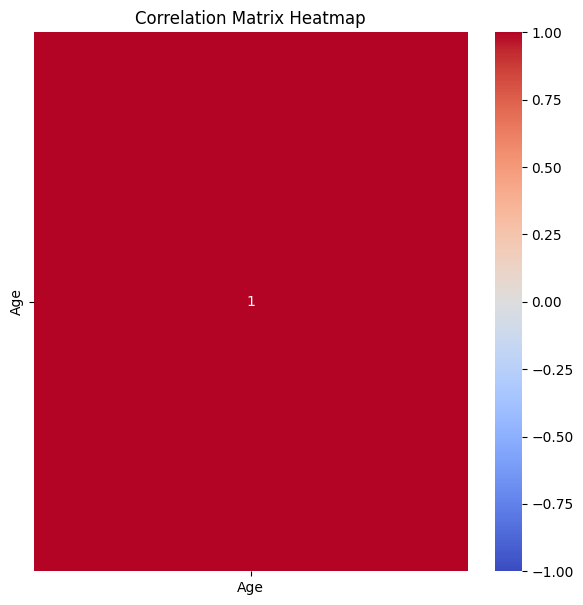

In [29]:
# Filter the DataFrame to include only numeric columns
numeric_data = data.select_dtypes(include=['number'])
# Create a heatmap of the correlation matrix
plt.figure(figsize=(7, 7))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


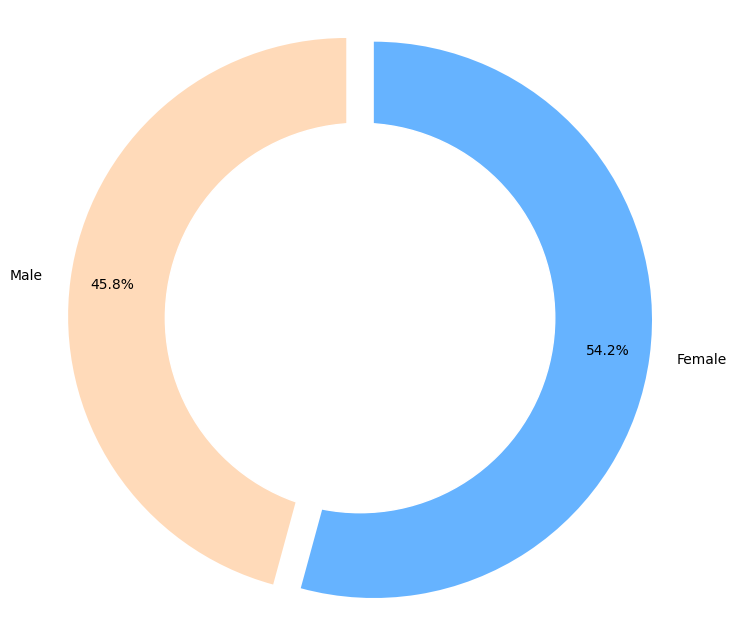

In [9]:
# male female ratio
labels = ['Male','Female']
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

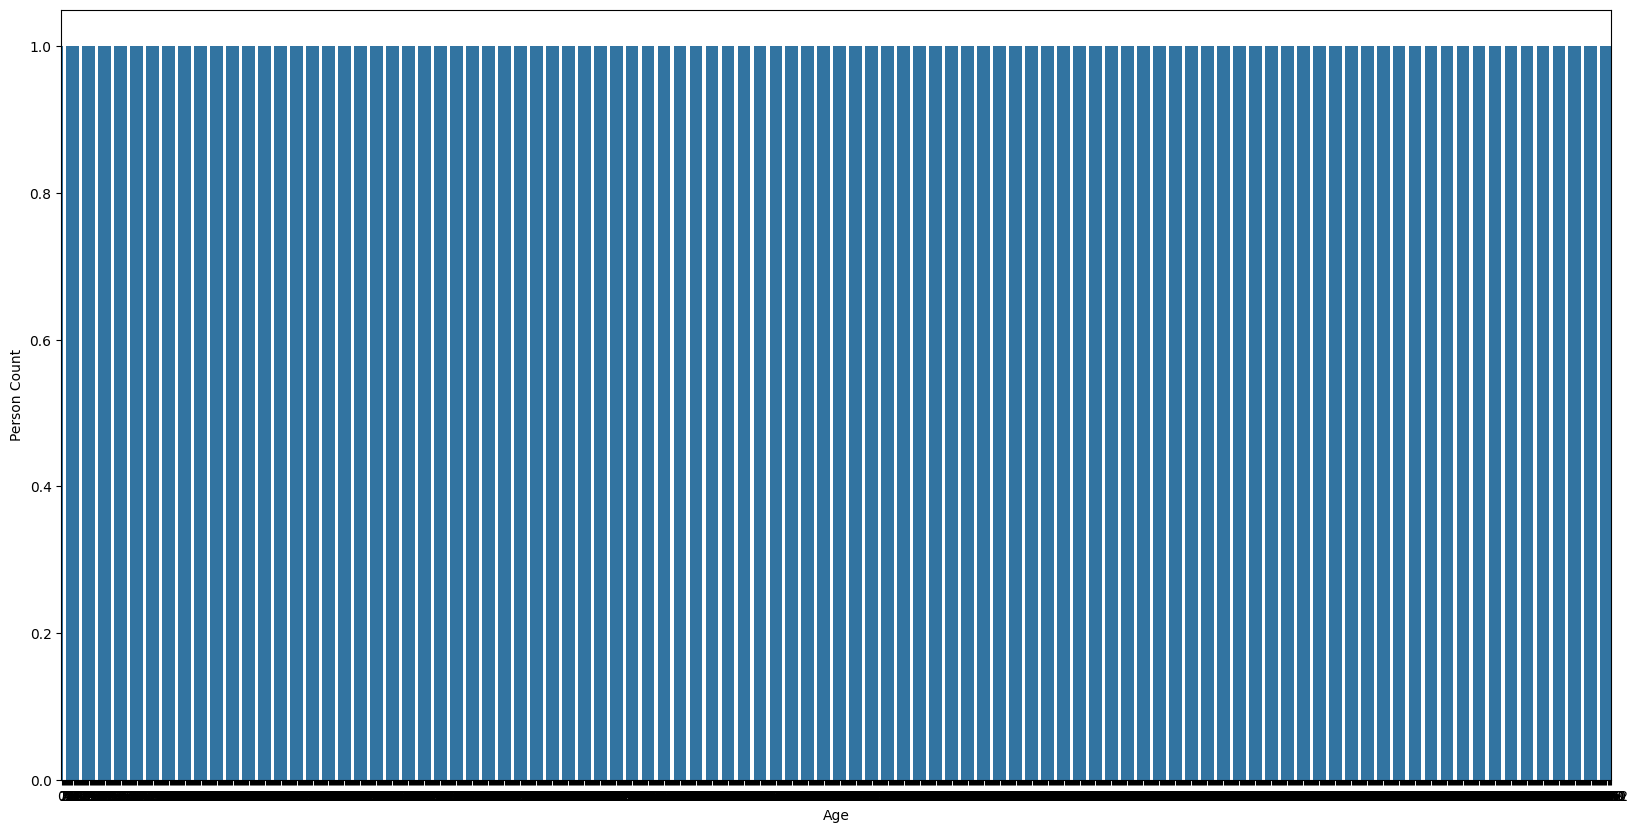

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(data.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

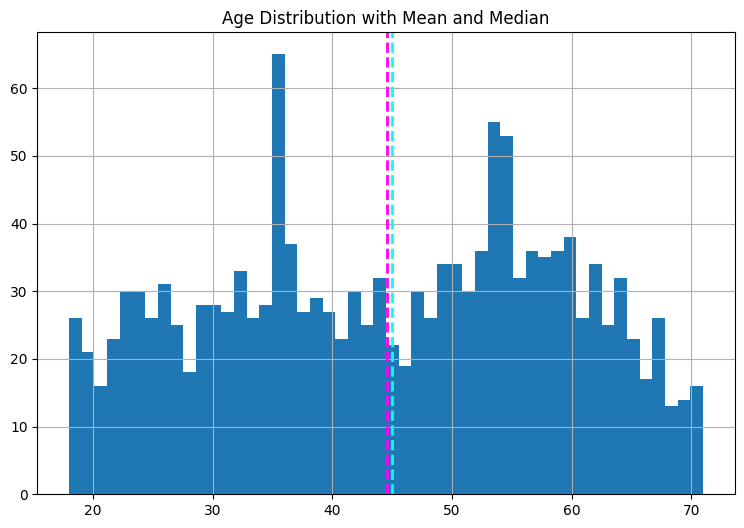

In [70]:
# Initial data exploration: distribution of 'Age'
age_column = ['Age']
for column in age_column:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[column]
    feature.hist(bins=50, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(f'{column} Distribution with Mean and Median')
plt.show()

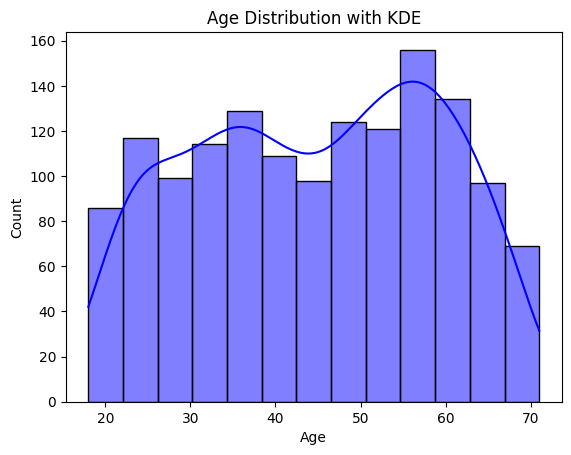

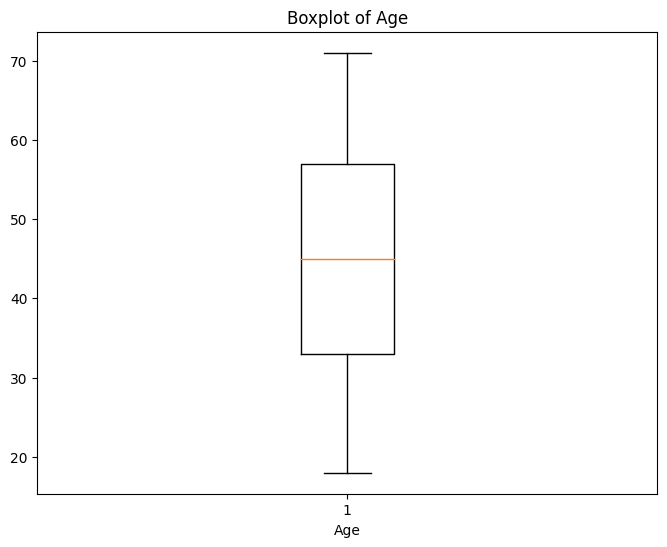

In [71]:
# Plot distribution and boxplot for 'Age'
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Age Distribution with KDE')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(data['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.show()


Visit Frequency Distribution:
VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64


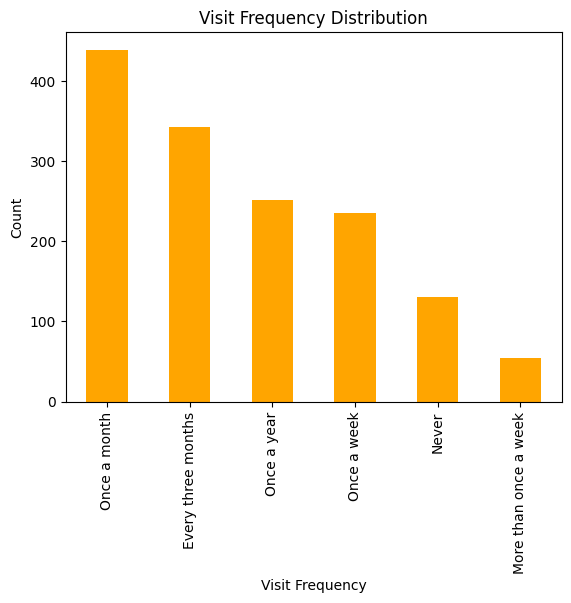

In [73]:
# Visualize 'VisitFrequency' distribution
print("\nVisit Frequency Distribution:")
print(data['VisitFrequency'].value_counts())
data['VisitFrequency'].value_counts().plot(kind='bar', color='orange')
plt.title('Visit Frequency Distribution')
plt.xlabel('Visit Frequency')
plt.ylabel('Count')
plt.show()

In [74]:
# Function to categorize 'Like' column
def categorize_likes(s):
    if s in 'I hate it!-5 ':
        return '-5'
    elif s == 'I love it!+5':
        return '5'
    else:
        return s

In [75]:
# Apply categorization and convert to numeric
data['Like'] = data['Like'].apply(categorize_likes)
data['Like'] = pd.to_numeric(data['Like'])
print("\nCategorized 'Like' Values:")
print(data['Like'].value_counts())


Categorized 'Like' Values:
Like
 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: count, dtype: int64


In [76]:
# Convert 'Gender' to numeric
data['Gender'] = data['Gender'].replace({'Female': '0', 'Male': '1'})
data['Gender'] = pd.to_numeric(data['Gender'])
print("\nNumeric Gender Values:")
print(data['Gender'].value_counts())


Numeric Gender Values:
Gender
0    788
1    665
Name: count, dtype: int64


In [77]:
# Map 'VisitFrequency' to numeric values
frequency_mapping = {
    'Every three months': 1, 'Once a week': 4, 'Once a month': 3,
    'Once a year': 0.5, 'More than once a week': 5, 'Never': 0
}
data['VisitFrequency'] = data['VisitFrequency'].replace(frequency_mapping)
data['VisitFrequency'] = pd.to_numeric(data['VisitFrequency'])


In [78]:
# Map binary columns to numeric values
binary_mapping = {'Yes': 1, 'No': 0}
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
data[binary_columns] = data[binary_columns].replace(binary_mapping)


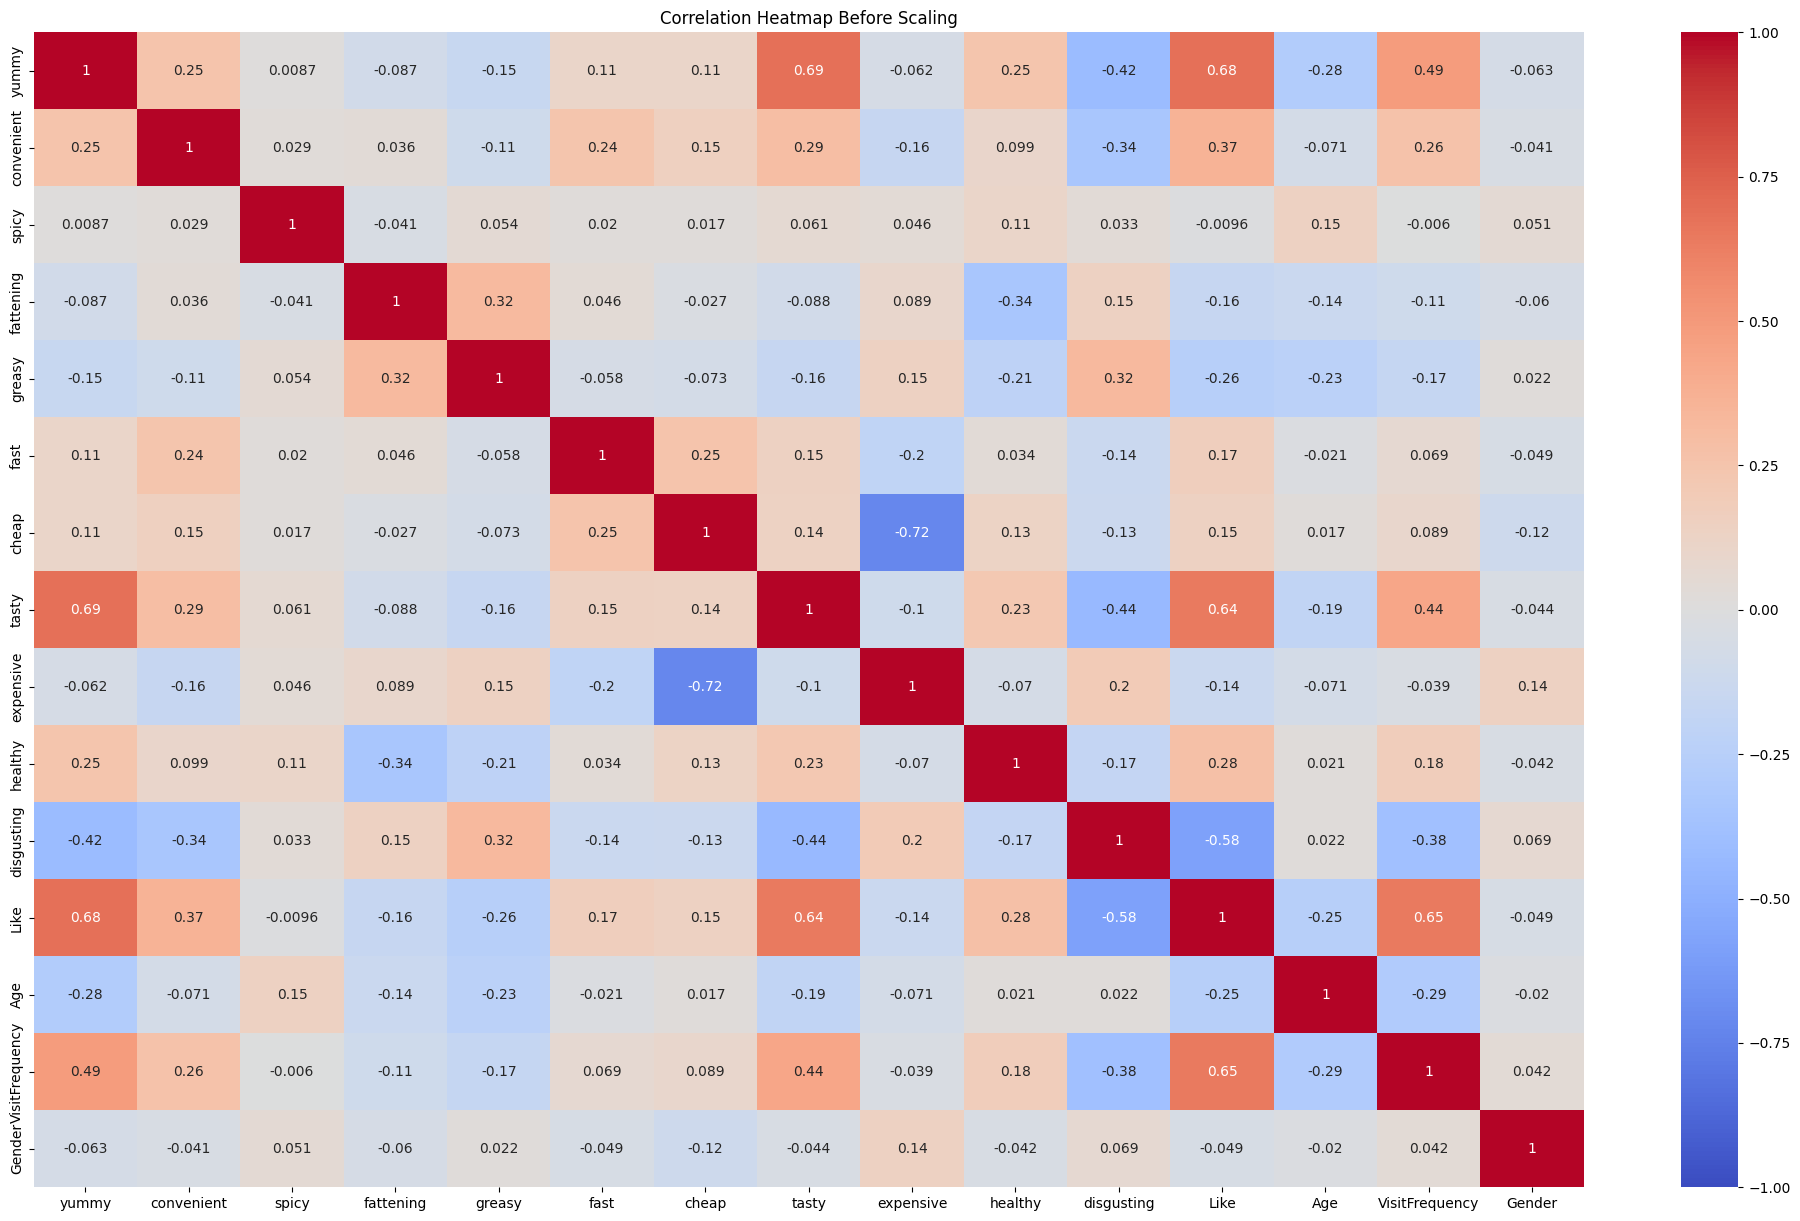

In [86]:
# Display heatmap of correlations before scaling
plt.figure(figsize=(25, 15))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlation Heatmap Before Scaling')
plt.show()


In [83]:
# Scale selected columns using MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['Like', 'Age', 'VisitFrequency']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [84]:
# Display the first few rows of the scaled data
print("\nScaled Data Preview:")
print(data.head())


Scaled Data Preview:
   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Like       Age  VisitFrequency  Gender  
0        0           0   0.2  0.811321             0.2       0  
1        0           0   0.7  0.622642             0.2       0  
2        1           0   0.6  0.830189             0.2       0  
3        0           1   0.9  0.962264             0.8       0  
4        1           0   0.7  0.584906             0.6       1  


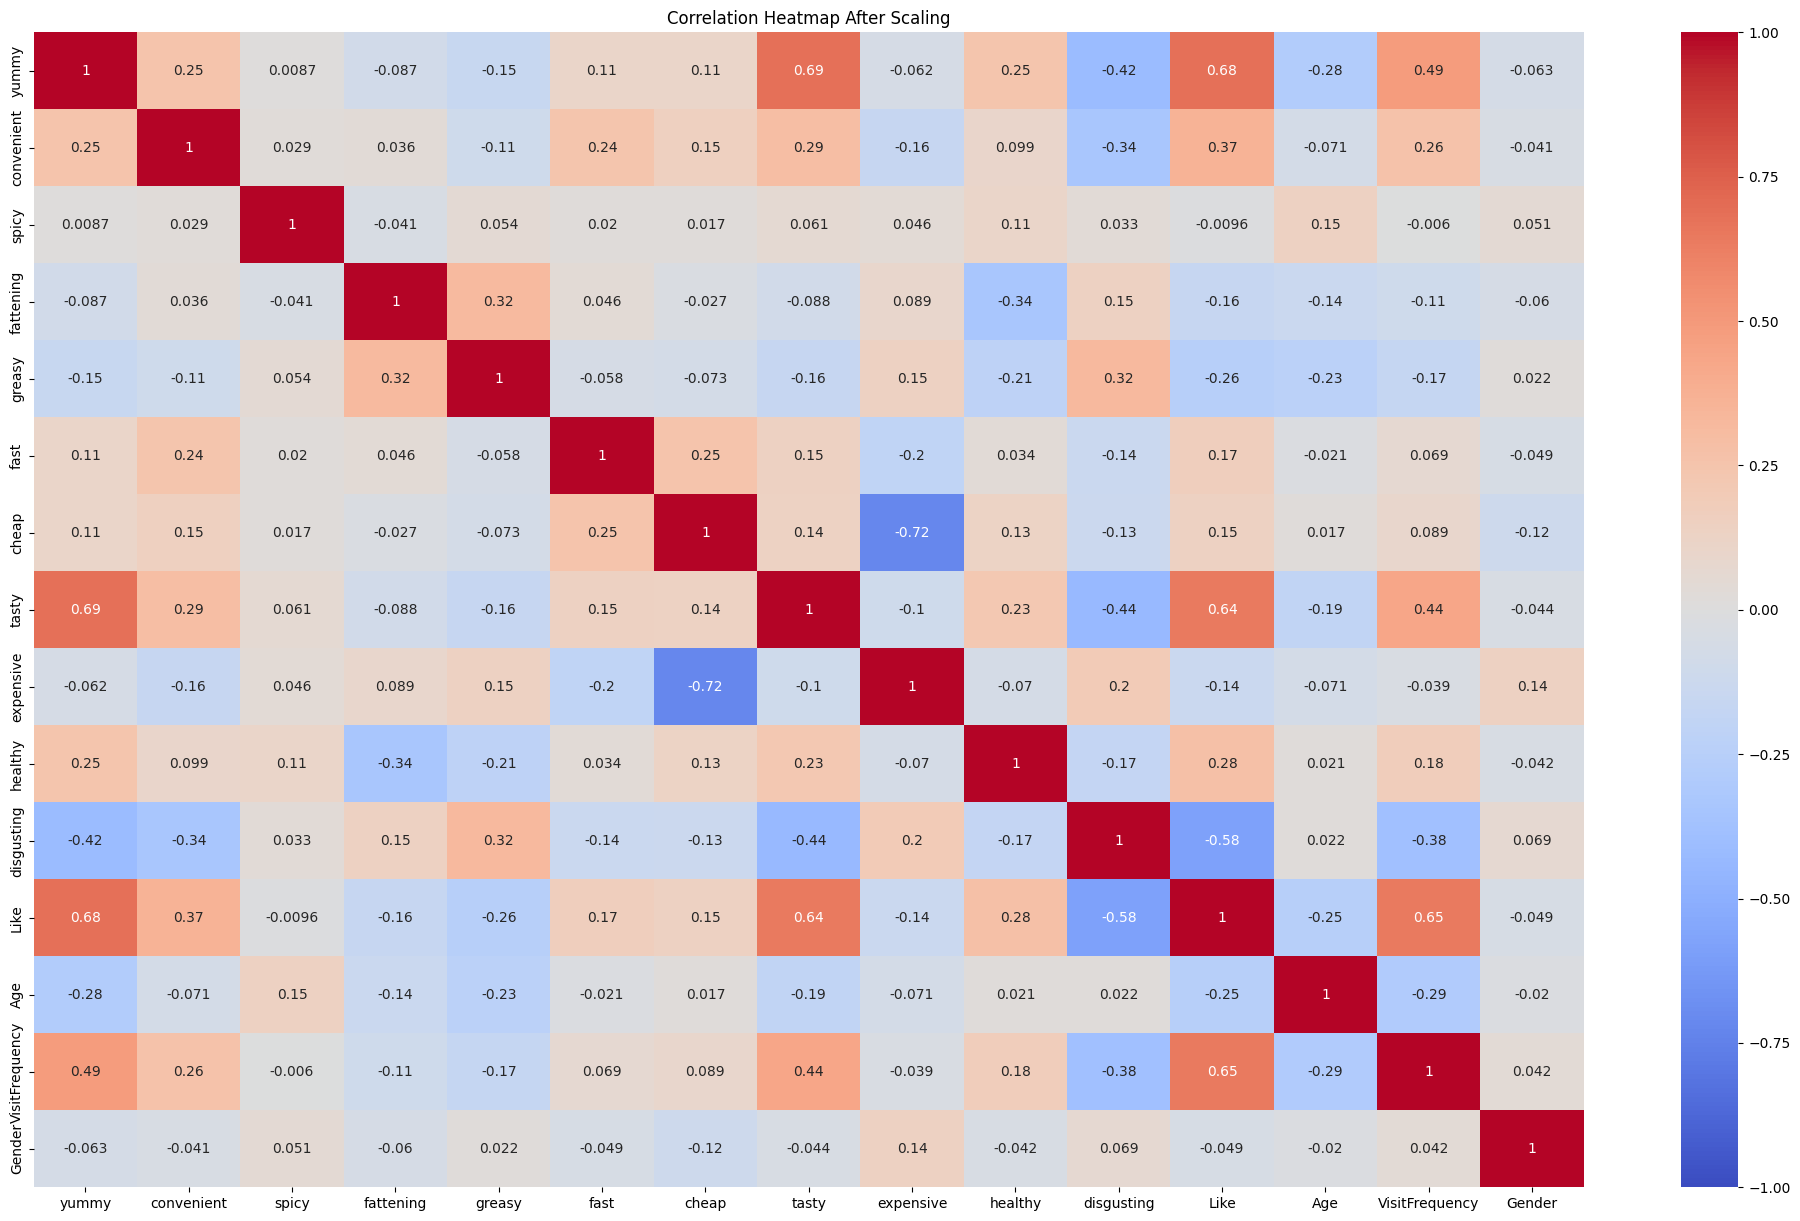

In [87]:
# Display heatmap of correlations after scaling
plt.figure(figsize=(25, 15))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlation Heatmap After Scaling')
plt.show()

In [88]:
# Determine the optimal number of clusters using the elbow method
inertia_scores = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data)
    inertia_scores.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

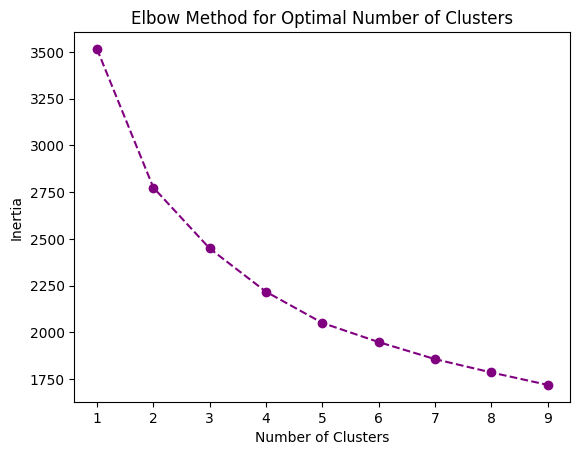

In [89]:
plt.plot(range(1, 10), inertia_scores, marker='o', linestyle='--', color='purple')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [90]:
# Apply KMeans clustering with the chosen number of clusters
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=1)
data['Cluster'] = kmeans.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [91]:
# Print the cluster assignments
print("\nCluster Assignments:")
print(data['Cluster'])


Cluster Assignments:
0       2
1       1
2       4
3       1
4       2
       ..
1448    3
1449    0
1450    4
1451    0
1452    3
Name: Cluster, Length: 1453, dtype: int32


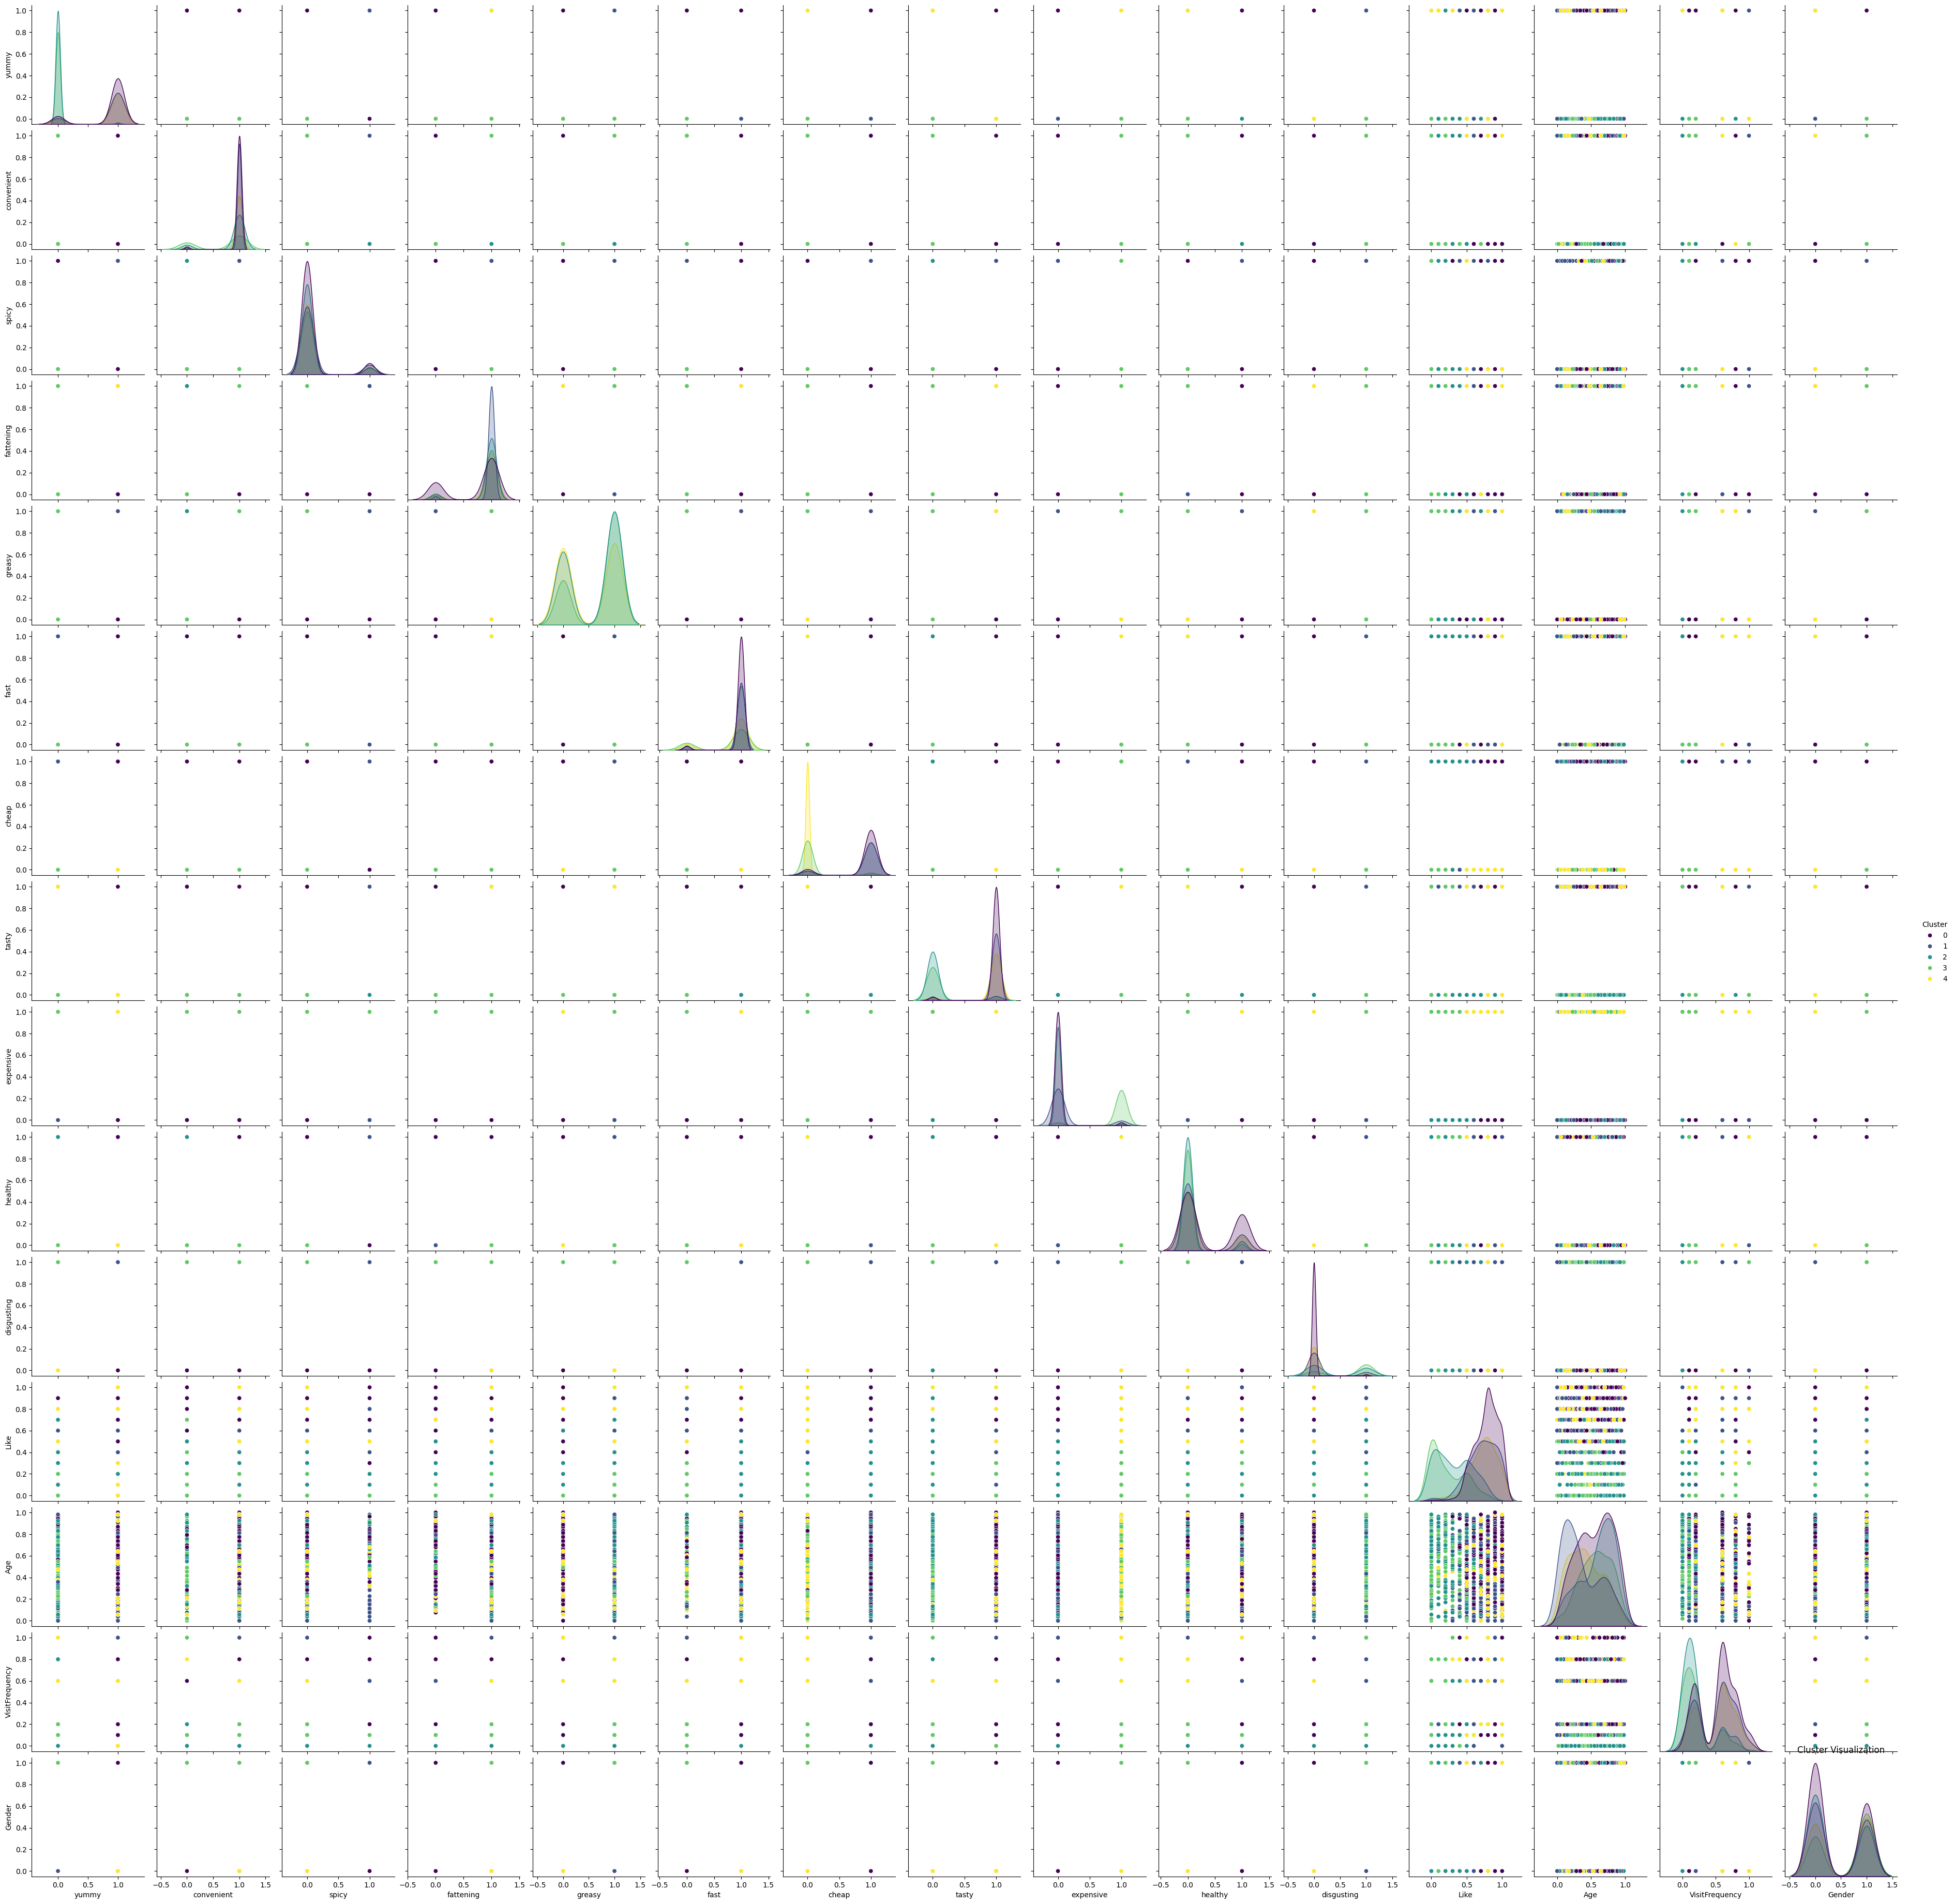

In [93]:
# Visualize the clusters with a pairplot
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.title('Cluster Visualization')
plt.show()

In [94]:
# Save the processed data with cluster assignments to a new CSV file
data.to_csv('/content/mcdonalds.csv', index=False)
print("Processed data with cluster assignments saved to mcdonalds_clustered.csv")

Processed data with cluster assignments saved to mcdonalds_clustered.csv
